In [1]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: missingno in c:\users\hakim\appdata\local\programs\python\python311\lib\site-packages (0.5.2)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import missingno as mno
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [3]:
TRAIN_PATH = r'../../Datasets/train.csv'
TEST_PATH = r'../../Datasets/test.csv'

In [4]:
train_dat = pd.read_csv(TRAIN_PATH)
test_dat = pd.read_csv(TEST_PATH)

# General

In [5]:
train_dat

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [6]:
train_dat.drop(columns='id')

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,E,106.38,material_7,material_6,6,9,2,9,4,18.059,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [7]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [8]:
train_dat.duplicated().sum()

0

In [10]:
train_dat.isna().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

# Unique Values

In [11]:
cols = train_dat.columns

for col in cols:
    print(f"{col} -> nunique: {train_dat[col].nunique()} \n -> unique val: {train_dat[col].unique()} \n ----------------- \n")

id -> nunique: 26570 
 -> unique val: [    0     1     2 ... 26567 26568 26569] 
 ----------------- 

product_code -> nunique: 5 
 -> unique val: ['A' 'B' 'C' 'D' 'E'] 
 ----------------- 

loading -> nunique: 11950 
 -> unique val: [ 80.1   84.89  82.43 ... 171.32 124.77 106.38] 
 ----------------- 

attribute_0 -> nunique: 2 
 -> unique val: ['material_7' 'material_5'] 
 ----------------- 

attribute_1 -> nunique: 3 
 -> unique val: ['material_8' 'material_5' 'material_6'] 
 ----------------- 

attribute_2 -> nunique: 4 
 -> unique val: [9 8 5 6] 
 ----------------- 

attribute_3 -> nunique: 4 
 -> unique val: [5 8 6 9] 
 ----------------- 

measurement_0 -> nunique: 29 
 -> unique val: [ 7 14 12 13  9 11  4 10  6  8 21 15 17 18 19 16  5 25  3  1 23 20 22  2
 26 24  0 29 27] 
 ----------------- 

measurement_1 -> nunique: 30 
 -> unique val: [ 8  3  1  2  4  6  0  9  5  7 10 12 11 13 17 14 16 15 18 20 24 22 21 19
 23 27 25 26 29 28] 
 ----------------- 

measurement_2 -> nunique: 25 

# Per Kolom

In [12]:
train_clean = train_dat.copy()

In [218]:
#tanggal_menjadi_anggota -> di drop karena banyak null
train_clean.drop(columns=["tanggal_menjadi_anggota"], inplace=True)

# EDA

## Univariate Analysis

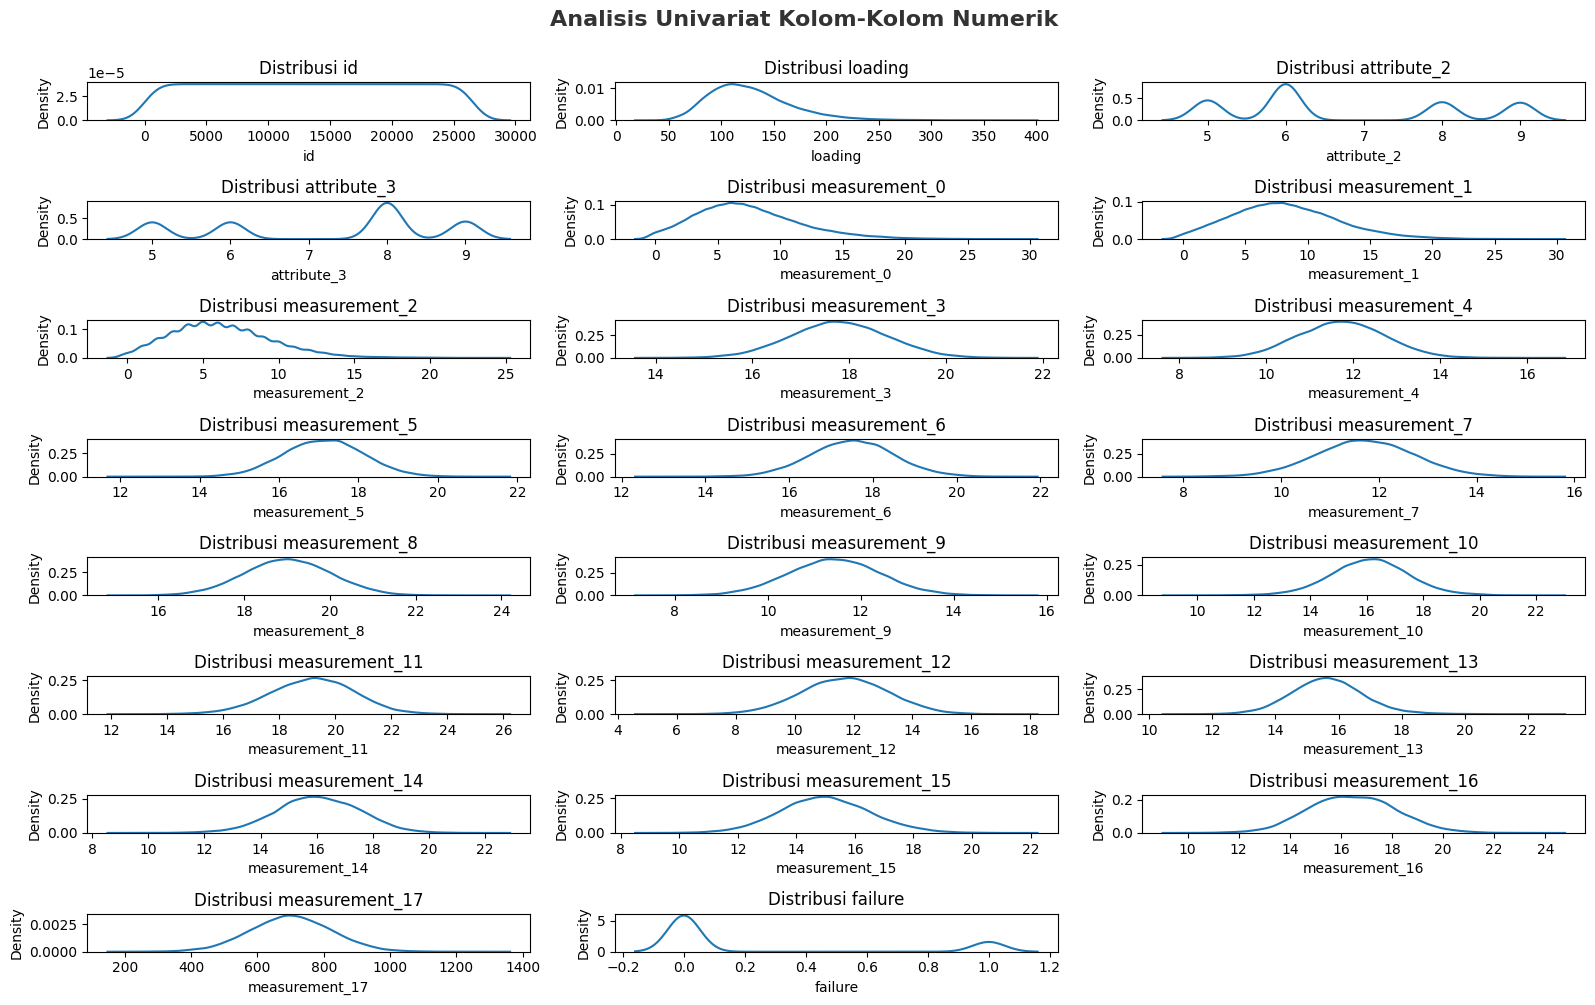

In [13]:
def univariate_analysis(preped_train, height=10):
    """
    Melakukan analisis univariat pada kolom-kolom numerik dalam DataFrame.

    Parameters:
        data (DataFrame): DataFrame yang akan dianalisis.
        tinggi (int, optional): Tinggi gambar subplot dalam inci (default: 10).

    Returns:
        None

    Contoh Penggunaan:
        analisis_univariat(data_viz, tinggi=10)
    """
    # Memfilter DataFrame untuk hanya mengandung kolom-kolom numerik
    numerical_columns = preped_train.select_dtypes(include=['number'])
    
    # Menentukan jumlah baris dan kolom untuk subplot secara dinamis
    num_numerical_cols = len(numerical_columns.columns)
    num_subplot_cols = 3  # Number of columns for subplots
    
    num_subplot_rows = (num_numerical_cols + num_subplot_cols - 1) // num_subplot_cols 
    
    # Membuat subplot
    plt.figure(figsize=(16, height))
    plt.suptitle('Analisis Univariat Kolom-Kolom Numerik', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
    for i, column in enumerate(numerical_columns.columns):
        plt.subplot(num_subplot_rows, num_subplot_cols, i + 1)
        sns.kdeplot(data=numerical_columns[column])
        plt.title(f'Distribusi {column}')
    
    plt.tight_layout()
    plt.show()

univariate_analysis(train_clean, height=10)

In [14]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [15]:
cat_cols = ['product_code', 'attribute_0', 'attribute_1']

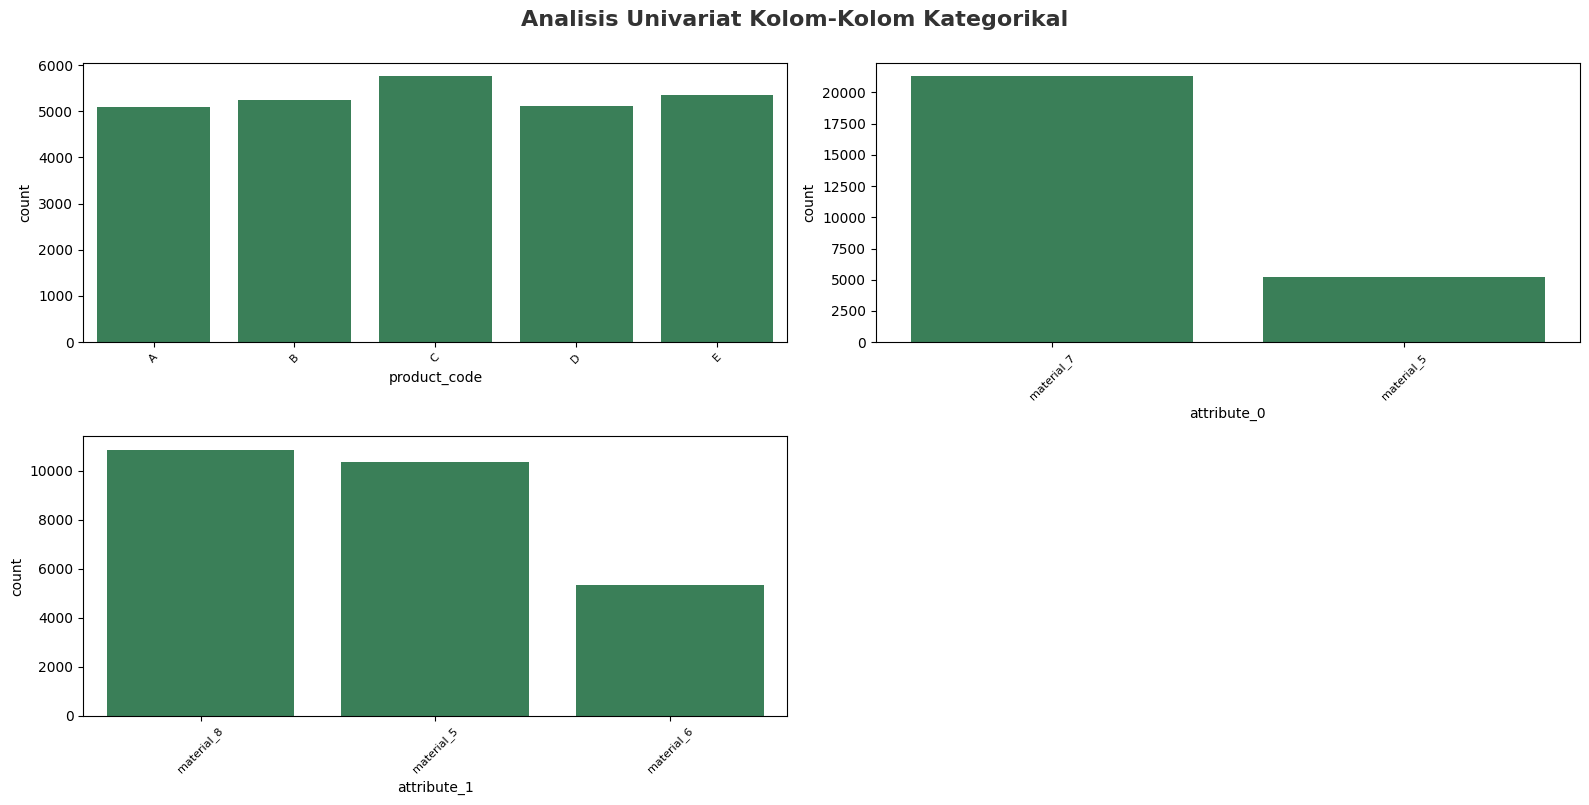

In [16]:
# Menampilkan analisis univariate untuk kolom kategorikal
plt.figure(figsize=(16, 8))
plt.suptitle('Analisis Univariat Kolom-Kolom Kategorikal', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols + 1) // 2  # Menghitung jumlah baris yang diperlukan untuk 2 kolom
for i in range(0, num_cat_cols):
    plt.subplot(num_rows, 2, i+1)   # Menggunakan 2 kolom
    sns.countplot(x=train_clean[cat_cols[i]], color='seagreen')
    plt.xticks(rotation=45, fontsize=8)  # Memutar label sumbu x sebesar 45 derajat dan mengatur fontsize
    plt.tight_layout()

<Axes: >

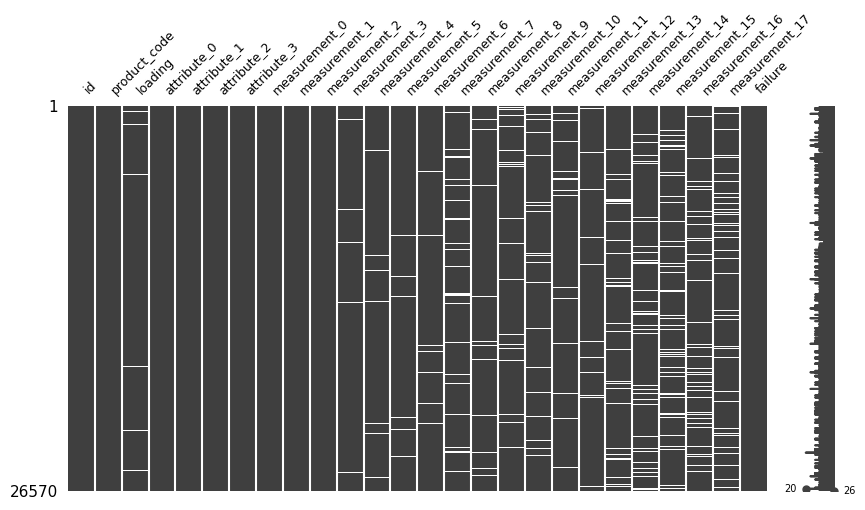

In [17]:
mno.matrix(train_clean, figsize=(10, 5), fontsize=9)

# Pearson

C:\Users\Hakim\AppData\Local\Temp\ipykernel_26484\2432075625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_clean.corr(method='pearson')


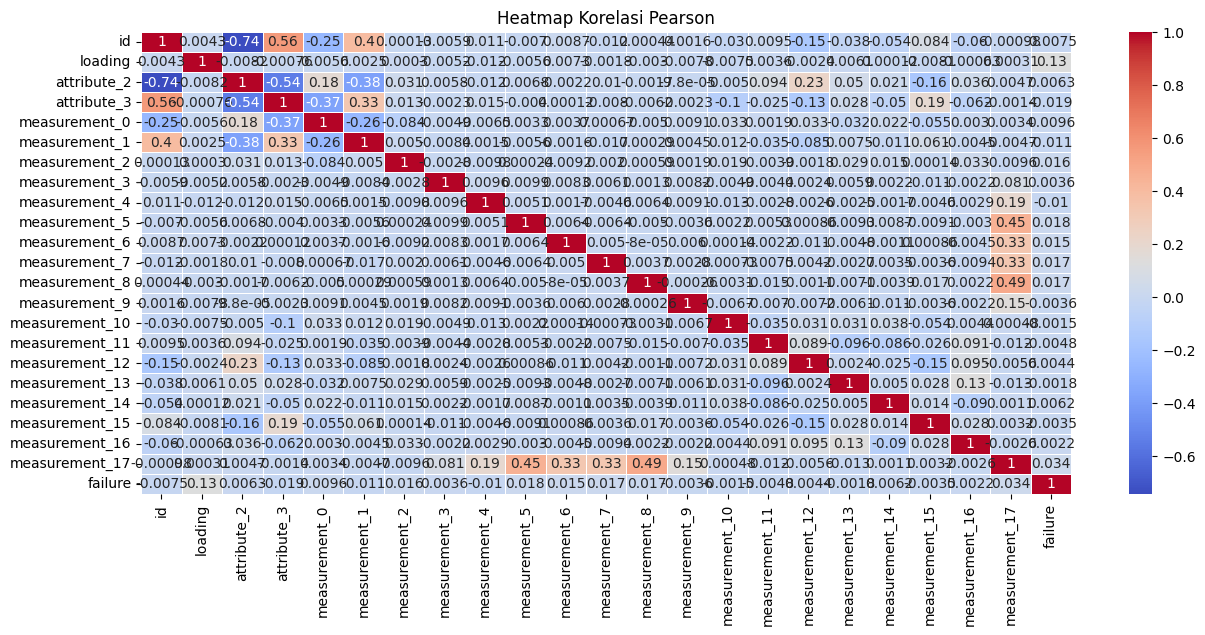

In [18]:
correlation_matrix = train_clean.corr(method='pearson')

# Menggambar heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Pearson')
plt.show()

# Embedded

In [27]:
train_clean = train_clean.fillna(train_clean.mean())

In [28]:
def label_encoder(train, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
    return train

In [29]:
cat_features = ['product_code','attribute_0', 'attribute_1' ]
train_clean = label_encoder(train_clean, cat_features)

In [30]:
X_train = train_clean.drop(columns='failure')
y_train = train_clean['failure']

In [32]:
X_train = X_train.drop(columns='id')

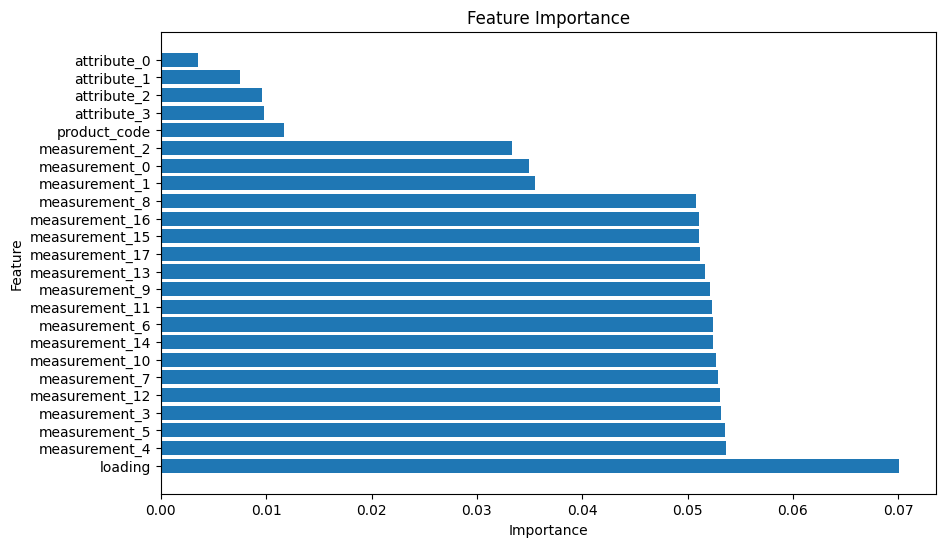

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6) ,)
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Select From Model

In [34]:
feature_names = X_train.columns

selector = SelectFromModel(estimator=RandomForestClassifier(), threshold='median')
selector.fit(X_train, y_train)
X_selected = selector.transform(X_train)


# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in selected_indices]

print("Selected feature names:", selected_feature_names)

print("Original number of features:", X_train.shape[1])
print("Number of selected features:", X_selected.shape[1])

Selected feature names: ['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14']
Original number of features: 24
Number of selected features: 12
